# Inferential Statistics
statistik yang BUKAN digunakan untuk mendeskripsikan data, tapi untuk mengambil konklusi dari data. untuk membuat pernyataan tentang data. contoh:
- kemungkinan ketemu murid yang beratnya 50-60kg di kampus tersebut adalah 17% --> probability distribution
- kampus tersebut berat baran muridnya ada di antara 45-65kg --> confidence interval
- rata-rata berat badan murid di kampus tersebut sekarang sekarang dibandingkan dengan 10 tahun yang lalu --> hypothesis testing

## Probability Distribution
- histogram untuk visualisasi

### continuous
angkanya berjalan terus, seperti waktu, berat, tinggi, uang, Rp.1 dan Rp.0.1 berbeda Rp.1.001, Rp.1.002, 50.001kg

angka angka yang poin desimal tergantung kekuatan alat yang kita gunakan untuk mengukur angka tersebut. kalau kita pakai timbangan jelek beratnya cuma terlihat per 500gr 50kg, 50.5kg tapi kita ganti timbangan digital tiba2 kita bisa dapat angka lebih spesifik 50.02kg dan 50.87kg, misal kita ganti timbangan kue yang lebih spesifik lagi, kita bisa dapat angka beda lagi
50.021kg dan 50.874kg, ini dinamakan angka yang continuous

tidak ada pembatas antara 1 angka dengan angka lainnya

- misalkan kita punya data berat badan murid kampus A, berapa kemungkinan ketemu orang yang berat badannya 50kg? 0%
- angka kita continuous, kita buat range (bin) satu keranjang untuk semua angka continuous di ukuran tersebut, masuk keranjang (bin) itu. misalakan binnya 40-50kg, 50-60kg, 60-70kg. kalau kita dapat orang yang beratnya 50.2kg --> masuk bin 50-60kg. kalau kita dapat orang yang beratnya 49.877kg --> masuk bin 40-50kg. kita hitung setiap bin ada berapa orang. total orang yang kita ukur ada berapa. baru dapat % per bin.
- kalau hasil bin bin dan % di gambar, kita dapat histogram

### discrete
angka bulat pas

misalnya jumlah murid di kelas 32, 17, 13, 40
misalnya hasil lempar dadu 1,2,3,4,5,6

- untuk setiap kemungkinan hasil sebuah angka, kita catat dari data kita, muncul berapa kali
- misalkan kita lempar dadu 100 kali, ada berapa 1 yang muncul, 2 yang muncul, 3 ... masing2 angka hasil lempar dadu muncul berapa kali?
- kita visualisasikan dengan histogram, 1 bin adalah 1 angka dadu

### Bentuk bentuk distribusi data
- uniform (semua hasil kemungkinan dapatanya sama, misal lempar dadu)
- normal (hasil yang mendekati rata2 kemungkinan paling tinggi, yang menjauh dari rata2 kemungkinan semakin kecil)
- ... ada jenis lainnya

untuk konsep2 berikut kita asumsikan kalau datanya normal semua

## Confidence Interval
- untuk angka rata2nya, misalkan "rata2 berat badan murid di kampus A adalah [45-65kg]"
- untuk proporsi/ persentase, misalkan "[60-70%] murid di kampus A mempunyai berat badan di atas 50kg"
*hanya 95% yakin
**dan tergantung data

## Hypothesis Testing
- bikin statement, alternate hypothesis, rata2 berat badan murid kampus A sekarang lebih tinggi dibanding 10 tahun yang lalu
- bikin statement terbalik, H0 null hypothesis, asumsi yang sekarang sedang kita gunakan yaitu
    "rata2 berat badan murid kampus A sekarang TIDAK ADA BEDANYA dengan rata2 berat badan murid kampus A 10 tahun yang lalu"
- H0 nya di test, kita dapat "p-value"
- kalau p-value di bawah 5% kita bisa bilang kalau H0 kita REJECT, artinya 
    "rata2 berat badan murid kampus A sekarang ADA BEDA SIGNIFIKAN dengan rata2 berat badan murid kampus A 10 tahun yang lalu"
    jadi
    kemungkinan statement awal yang mau kita buat itu benar
- kalau p-value 5% keatas, kita bisa bilang kalau kita GAGAL REJECT H0, FAIL TO REJECT asumsi kita,
    "rata2 berat badan murid kampus A sekarang BEDANYA TIDAK SIGNIFIKAN dengan rata2 berat badan murid kampus A 10 tahun yang lalu"
    tidak ada yang kita yakinkan
    kemungkinan statement kita salah

*hanya 95% yakin
**dan tergantung data

In [11]:
# import package dulu
# olah data
import numpy as np
import pandas as pd

# visualisasi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

# statistik
import statsmodels.api as sm

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# import data
df_nba = pd.read_csv("dataset/nbaallelo.csv")
df_nba = df_nba.drop(columns=['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id',
       'seasongame', 'is_playoffs', 'fran_id', 'elo_i',
       'elo_n', 'win_equiv',  'opp_fran',  'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'])

df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date_game  126314 non-null  object
 1   team_id    126314 non-null  object
 2   pts        126314 non-null  int64 
 3   opp_id     126314 non-null  object
 4   opp_pts    126314 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.8+ MB


In [3]:
df_nba

,date_game,team_id,pts,opp_id,opp_pts
0,11/1/1946,TRH,66,NYK,68
1,11/1/1946,NYK,68,TRH,66
2,11/2/1946,CHS,63,NYK,47
3,11/2/1946,NYK,47,CHS,63
4,11/2/1946,DTF,33,WSC,50
...,...,...,...,...,...
126309,6/11/2015,CLE,82,GSW,103
126310,6/14/2015,GSW,104,CLE,91
126311,6/14/2015,CLE,91,GSW,104
126312,6/16/2015,CLE,97,GSW,105


104.46623311655829


Text(0.5, 1.0, 'Distribusi probabilitas tim BOS skor berapa poin dalam 1 game')

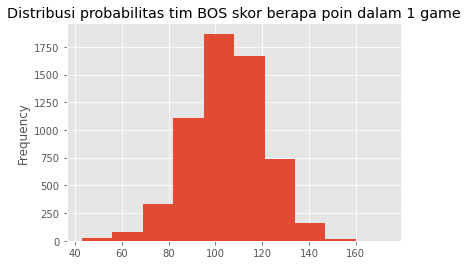

In [4]:
# tim BOS biasanya skor berapa poin? buat distribusi
df_bos = df_nba[df_nba["team_id"]=="BOS"]

print(df_bos["pts"].mean())

df_bos["pts"].plot(kind="hist")
plt.title("Distribusi probabilitas tim BOS skor berapa poin dalam 1 game")

104.46623311655829 mean
16.054123830415808 std


Text(0.5, 1.0, 'Distribusi probabilitas tim BOS skor berapa poin dalam 1 game')

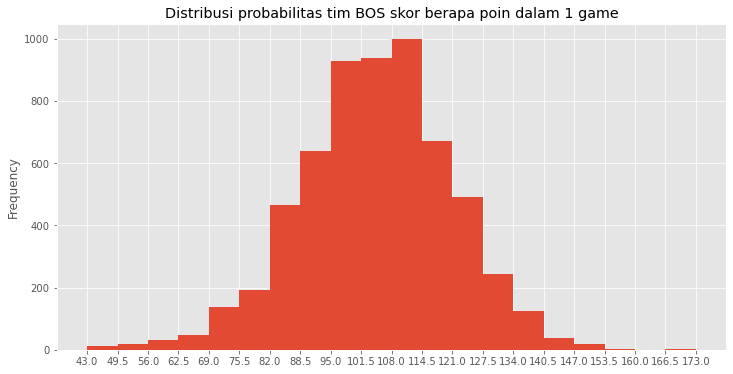

In [5]:
# pakai numpy untuk pasin garis x ticks dengan bin
df = df_bos["pts"] # data
n = 20 # jumlah bins

count, bin_edges = np.histogram(df, bins=n)

print(df.mean(), "mean")
print(df.std(), "std")

df.plot(kind="hist", bins=n, xticks=bin_edges, figsize=(12,6))
plt.title("Distribusi probabilitas tim BOS skor berapa poin dalam 1 game")

In [6]:
# Confidence Interval untuk rata2 skor tim BOS per game berapa
mean = 104.4
std = 16.0

# Confidence Interval dihitung dengan 
# Best Estimate +- margin of error

# Confidence Interval dihitung dengan 
- Best Estimate +- margin of error
- Margin of Error = z * standard error
- z = 1.96 untuk menunjukkan level keyakinan 95%

biasanya ditulis dengan format dari angka kecil - angka besar   

dari (Best Estimate - margin of error) sampai (Best Estimate + margin of error)   


## CI mean
confidence interval mean

"rata2 berat badan murid di kampus A adalah [45-65kg]"   
confidence interval 45-55 artinya punya best estimate 55kg +- margin error 10kg

- Best Estimate = mean
- Margin of Error = z * standard error
- z = 1.96
- standard error = std / np.sqrt(jumlah_data)

## CI persentase/proporsi
confidence interval proporsi

"[60-70%] murid di kampus A mempunyai berat badan di atas 50kg"
confidence interval 60-70% artinya proporsi/persentase awal adalah 65%, margin error 5%, jadi 65% +- 5%

- Best Estimate = proporsi = p
- Margin of Error = z * standard error
- z = 1.96
- standard error = np.sqrt(p * (1-p) / jumlah_data)

In [7]:
# Confidence Interval untuk rata2 skor tim BOS per game berapa
df = df_bos["pts"]  # data

mean = df.mean()
std = df.std()
jumlah_data = len(df)

be = mean

z = 1.96
se = std / np.sqrt(jumlah_data)

me = z * se

print([be - me, be + me])

[104.0599061411236, 104.87256009199297]


In [8]:
# tim BOS biasanya skor 104 - 105 per game

In [12]:
# Confidence Interval untuk tim BOS bisa skor lebih dari 100 poin di sebuah game basket NBA
df = df_bos["pts"] # data

# yang lebih dari 100 ada berapa persen?
lebih_dari_100 = len(df[df > 100])
jumlah_data = len(df)
print(jumlah_data)

p = lebih_dari_100 / jumlah_data
print(p)

be = p
z = 1.96
se = np.sqrt(p * (1-p) / jumlah_data)
me = z * se

print(be-me, be+me)

5997
0.6101384025346006
0.5977943302487082 0.622482474820493


In [10]:
# 60-62% kemungkinan kalau tim BOS skor diatas 100 di sebuah game NBA

# Hypothesis Testing

In [18]:
# One Population Proportion
# membandingkan proporsi satu populasi dulu dan sekarang apakah berbeda secara signifikan

# dulu lebih dari 60% game skor nya diatas 100
# sekarang 61%, dari 5997 game
# apakah sekarang > dulu persentase kemungkinan dapat skor diatas 100?

# H1: p > 0.6
# H9: p = 0.6

n = 5997
pnull = 0.60
phat = 0.61

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')
print(pvalue)

# pilih error rate nya, biasanya di 5% yaitu 0.05. alpha nya 0.05
alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis, ada perbedaan signifikan antara proporsi dulu dan sekarang")
else:
    print("FAIL to REJECT null hypothesis, tidak ada konklusi")

0.05617653469375571
FAIL to REJECT null hypothesis, tidak ada konklusi


In [24]:
# Difference in Population Means
# apakah ada perbedaan rata-rata antara dua populasi

# rata2 skor tim BOS dan LAL apakah berbeda?
df_bos_pts = df_bos['pts']
df_lal = df_nba[df_nba["team_id"]=="LAL"]
df_lal_pts = df_lal['pts']

# df_bos_pts
# df_lal_pts


In [25]:
# BOS
# rata2
# jumlah data
# std dev

print(df_bos_pts.mean())
print(len(df_bos_pts))
print(df_bos_pts.std())

104.46623311655829
5997
16.054123830415808


In [26]:
# LAL
# rata2
# jumlah data
# std dev

print(df_lal_pts.mean())
print(len(df_lal_pts))
print(df_lal_pts.std())

108.15576998818432
5078
13.829997013734864


In [29]:
zstat, pvalue = sm.stats.ztest(df_bos_pts, df_lal_pts, alternative="two-sided")
print(pvalue)

# pilih error rate nya, biasanya di 5% yaitu 0.05. alpha nya 0.05
alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis, ada perbedaan signifikan antara rata rata skor tim BOS dan LAL")
else:
    print("FAIL to REJECT null hypothesis, tidak ada konklusi")

1.0617188006764025e-37
REJECT null hypothesis, ada perbedaan signifikan antara rata rata skor tim BOS dan LAL
